# Computational Drug Discovery

## Regression Models with Random Forest

 We will be building a regression model of Replicase polyprotein 1ab inhibitors using the random forest algorithm.

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Load the data set

In [2]:
df = pd.read_csv('RP1ab_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

### Input features

In [3]:
df.shape

(1136, 308)

The Replicase polyprotein 1ab data set contains 307 input features and 1 output variable (pIC50 values).

In [4]:
# Inpit features
X = df.drop('pIC50', axis=1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,1,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
1132,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
1133,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1134,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1


In [5]:
# Output feature
Y = df.pIC50
Y

0       6.408935
1       6.677781
2       7.096910
3       5.801343
4       7.397940
          ...   
1131    7.743282
1132    7.649364
1133    5.093665
1134    5.327902
1135    5.195179
Name: pIC50, Length: 1136, dtype: float64

#### Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [7]:
X.shape

(1136, 10)

###  Data split (80/20 ratio)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, Y_train.shape

((908, 10), (908,))

In [17]:
X_test.shape, Y_test.shape

((228, 10), (228,))

### Building a Regression Model using Random Forest

In [25]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.40336004725813357

In [26]:
Y_pred = model.predict(X_test)

### Scatter Plot of Experimental vs Predicted pIC50 Values

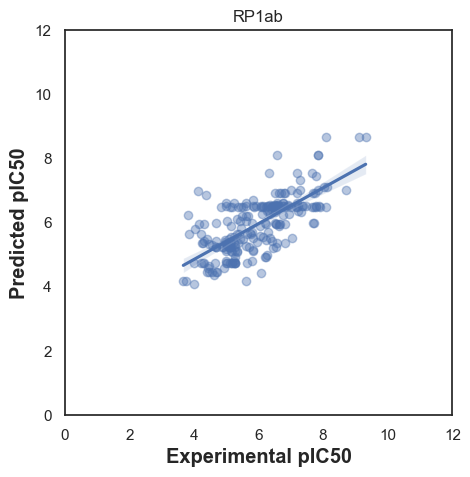

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.title("RP1ab")
plt.show

plt.savefig('RP1ab_plot_Prediction_RandomForest_Regressor.pdf')
plt.savefig('RP1ab_plot_Prediction_RandomForest_Regressor.png')

## Comparing Regressors

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

### Compare ML algorithms

In [27]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:04<00:00,  8.41it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 10
[LightGBM] [Info] Start training from score 5.982652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████| 42/42 [00:03<00:00, 11.29it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 10
[LightGBM] [Info] Start training from score 5.982652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [28]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.58,0.59,0.74,0.01
ExtraTreeRegressor,0.58,0.59,0.74,0.02
ExtraTreesRegressor,0.58,0.59,0.74,0.22
GaussianProcessRegressor,0.58,0.59,0.74,0.39
XGBRegressor,0.58,0.59,0.74,0.18
RandomForestRegressor,0.58,0.58,0.75,0.29
BaggingRegressor,0.57,0.57,0.76,0.07
HistGradientBoostingRegressor,0.54,0.54,0.78,0.32
NuSVR,0.50,0.50,0.81,0.12


In [29]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.38,0.41,0.93,0.23
HistGradientBoostingRegressor,0.37,0.40,0.94,0.29
BaggingRegressor,0.37,0.40,0.94,0.08
NuSVR,0.37,0.39,0.94,0.07
LGBMRegressor,0.36,0.39,0.95,0.06
ExtraTreeRegressor,0.36,0.39,0.95,0.02
ExtraTreesRegressor,0.36,0.38,0.95,0.20
DecisionTreeRegressor,0.35,0.38,0.95,0.02
GradientBoostingRegressor,0.35,0.37,0.96,0.14


### Data visualization of model performance

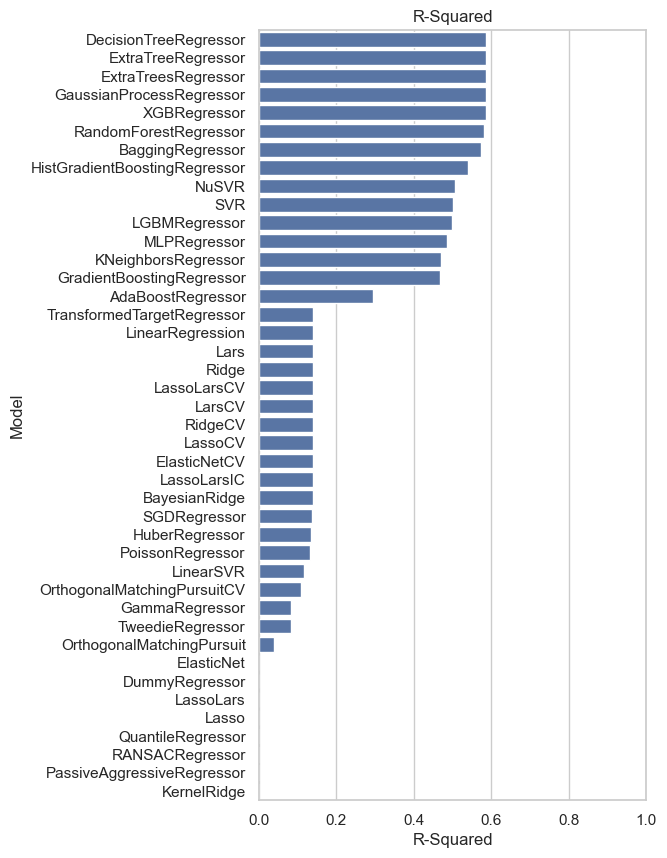

In [40]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.title("R-Squared")

plt.savefig('RP1ab_plot_Prediction_Rsquared_Comparing_Regressors.pdf')
plt.savefig('RP1ab_plot_Prediction_Rsquared_Comparing_Regressors.png')

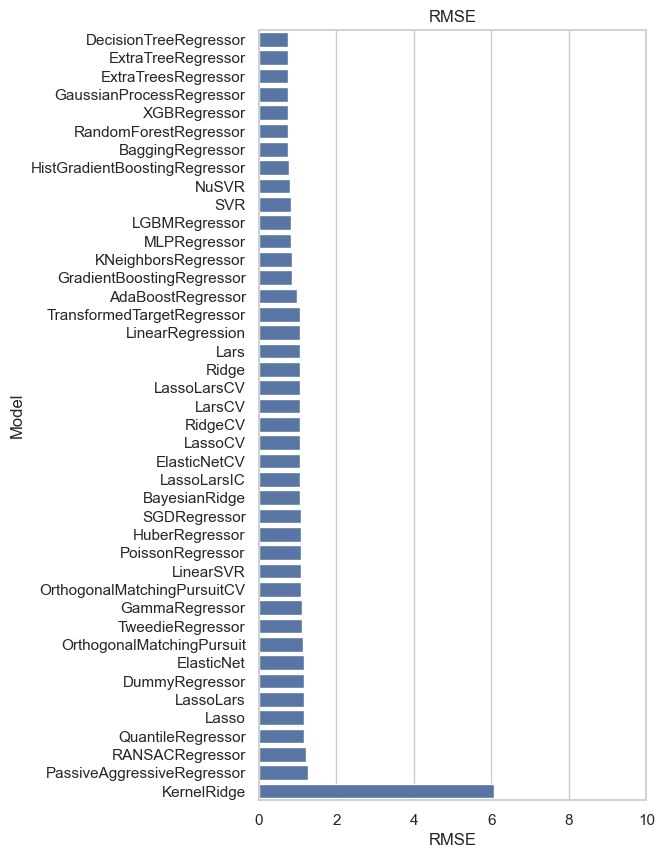

In [41]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.title("RMSE")

plt.savefig('RP1ab_plot_Prediction_RMSE_Comparing_Regressors.pdf')
plt.savefig('RP1ab_plot_Prediction_RMSE_Comparing_Regressors.png')

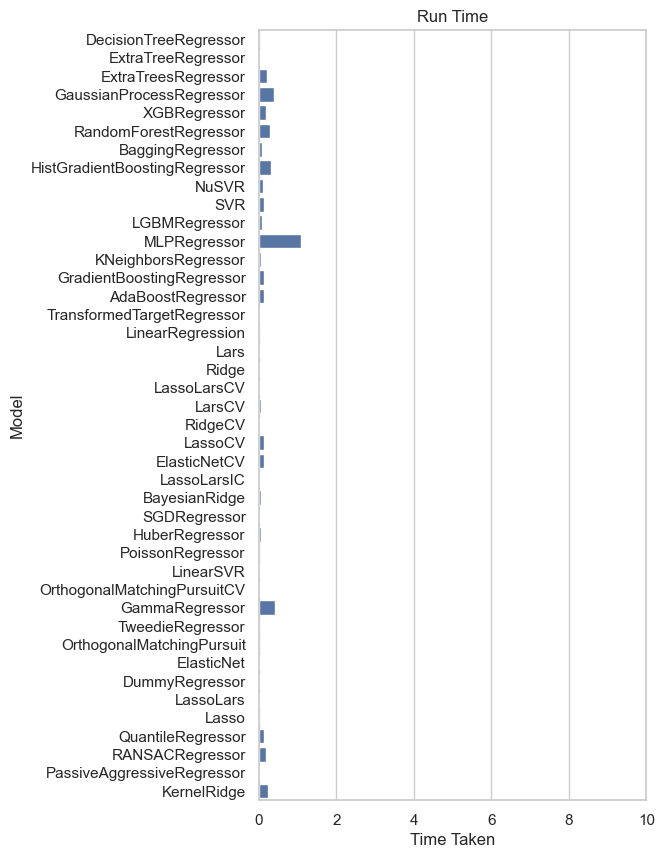

In [42]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.title("Run Time")

plt.savefig('RP1ab_plot_Prediction_RunTime_Comparing_Regressors.pdf')
plt.savefig('RP1ab_plot_Prediction_RunTime_Comparing_Regressors.png')